In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기 (학습데이터, 테스트 데이터)
- 데이터 분석단계에서 생성한 농구포지션 예측하기의 학습 데이터 및 테스트 데이터를 로드합니다.

In [2]:
train = pd.read_csv('data/csv/basketball_train.csv')
test = pd.read_csv('data/csv/basketball_test.csv')

In [3]:
print(train.shape[0]) # 훈련용 데이터 셋 개수
print(train.shape[1]) # feature 갯수

print(test.shape[0]) # 훈련용 데이터 셋 개수
print(test.shape[1]) # feature 갯수

80
5
20
5


## 최적의 k 찾기

In [21]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier

In [22]:
from sklearn.model_selection import cross_val_score

# 최적의 k 찾기.최소 3부터 시작 최대 max_k_range / 2 까지의 범위.

max_k_range = train.shape[0] // 2
k_list = []

for i in range(3, max_k_range , 2): #3, 5, 7, 9 , ... 39
    k_list.append(i)                 # for문 한번에 총 데이터 값만큼 돌린다.
    
print(k_list)

cross_validation_scores = []
x_train = train[['3P', 'TRB', 'BLK']]
y_train = train[['Pos']]

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]


In [24]:
# 10 - fold corss validation
for k in k_list:                #for문돌동안 k=3,5,7,9,...39까지 돌리면서 정답율을 구함
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv = 10, scoring = 'accuracy') #cv : 등분
    
    cross_validation_scores.append(scores.mean())    #
    
cross_validation_scores

[0.9375,
 0.9,
 0.9,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.825,
 0.825,
 0.825,
 0.8,
 0.7875]

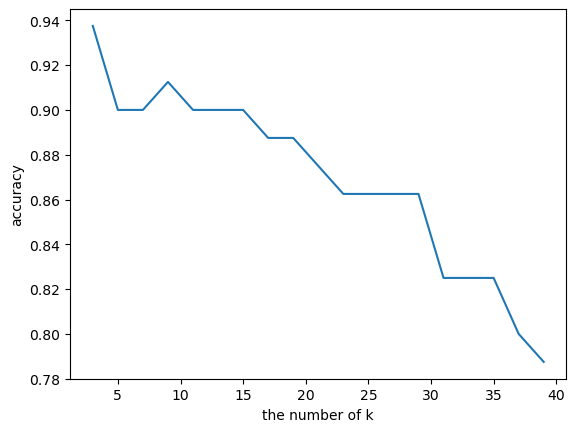

In [26]:
#시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('accuracy')
plt.show()

In [27]:
# 최적의 k값
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("최적의 k 값 : " + str(k))

최적의 k 값 : 3


## 2개의 특징으로 예측하기('3P', 'BLK') 

In [28]:
knn = KNeighborsClassifier(n_neighbors = k) # k=3

x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [30]:
comparision = pd.DataFrame({'prediction':pred, 'target': y_test.values.ravel()})
comparision

,prediction,target
0,SG,C
1,SG,SG
2,C,C
3,SG,SG
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,C,C


In [31]:
from sklearn.metrics import accuracy_score

print("accuracy : "+ str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.9


## 3개의 특징으로 예측하기 (3P,TRB,BLK)

In [32]:
knn = KNeighborsClassifier(n_neighbors = k) # k=3

x_train2 = train[['3P', 'TRB', 'BLK']]
y_train2 = train[['Pos']]

knn.fit(x_train2, y_train2.values.ravel())

x_test2 = test[['3P', 'TRB', 'BLK']]
y_test2 = test[['Pos']]

pred2 = knn.predict(x_test2)

comparision2 = pd.DataFrame({'prediction':pred2, 'target': y_test2.values.ravel()})
comparision2

,prediction,target
0,SG,C
1,SG,SG
2,C,C
3,SG,SG
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,C,C


In [33]:
print("accuracy : "+ str(accuracy_score(y_test2.values.ravel(), pred2)))

accuracy : 0.9
